In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [19]:
# Load the dataset
df = pd.read_csv("C:/Users/Yassine Lahniche/Downloads/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition/ObesityDataSet_raw_and_data_sinthetic.csv")

# Display the first 5 rows of the dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [20]:
# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Confirm no missing values remain
print("\nMissing values after dropping:")
print(df.isnull().sum())

Missing values in the dataset:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Missing values after dropping:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                    

In [21]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder for each categorical column
label_encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_columns}

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = label_encoders[col].transform(df[col])

# Display the first 5 rows after encoding
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [22]:
# Function to remove outliers
def remove_outliers(data, columns, lower=0.01, upper=0.99):
    """Remove extreme values using percentiles."""
    for col in columns:
        q1, q99 = data[col].quantile([lower, upper])
        data = data[(data[col] >= q1) & (data[col] <= q99)]
    return data

# Remove outliers from numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df = remove_outliers(df, numerical_columns)

# Display the shape of the dataset after removing outliers
print("Dataset shape after removing outliers:", df.shape)

Dataset shape after removing outliers: (1995, 17)


In [23]:
# Compute the correlation matrix
corr_matrix = df.corr().abs()

# Identify highly correlated features (above the threshold)
threshold = 0.85
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns to drop (keeping only one from each correlated pair)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

# Drop the selected columns
df.drop(columns=to_drop, inplace=True)

# Display the remaining columns
print("Columns after dropping highly correlated features:", df.columns)

Columns after dropping highly correlated features: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [24]:
# Save the processed dataset to a CSV file
df.to_csv("C:/Users/Yassine Lahniche/Downloads/processed_obesity_dataset.csv", index=False)

print("Processed dataset saved successfully!")

Processed dataset saved successfully!


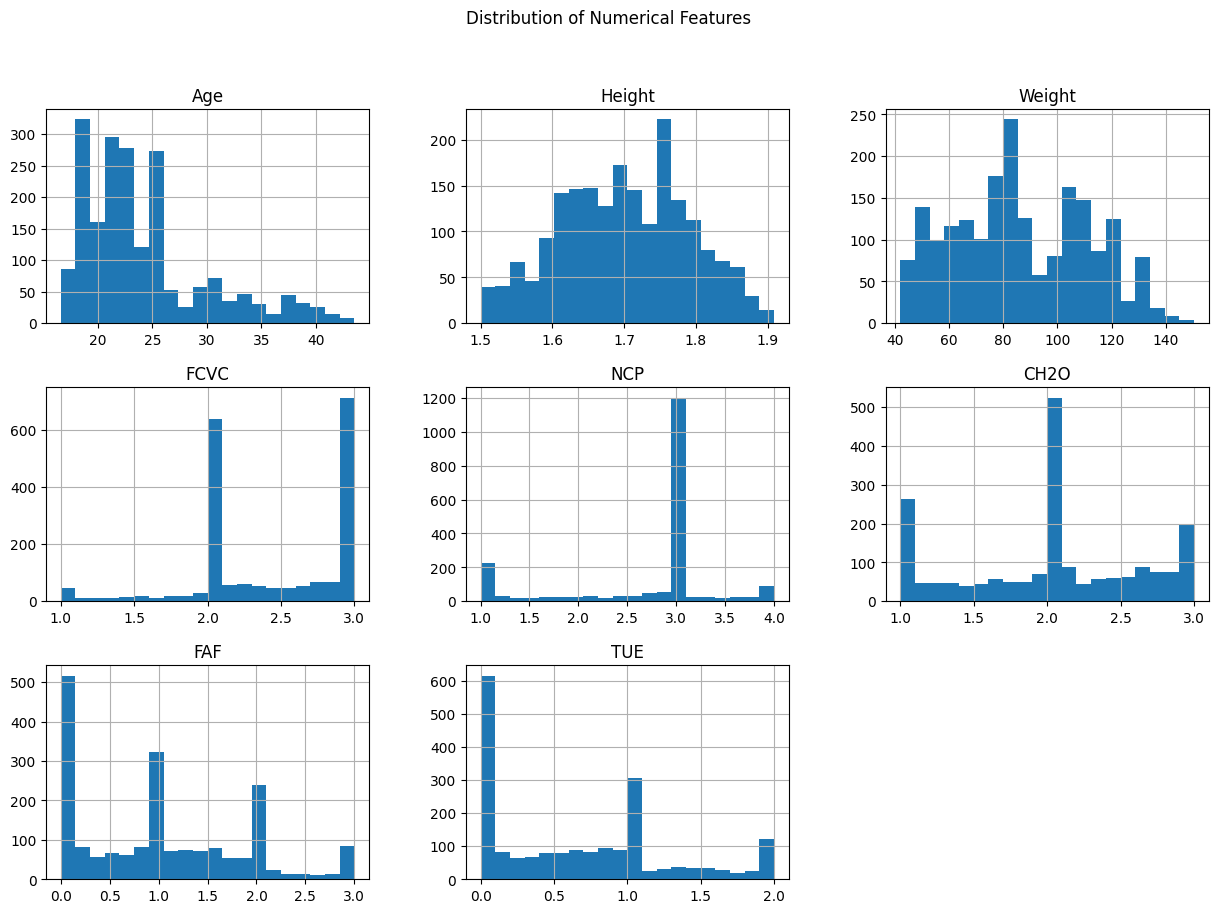

In [25]:
# Plot histograms for numerical features
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

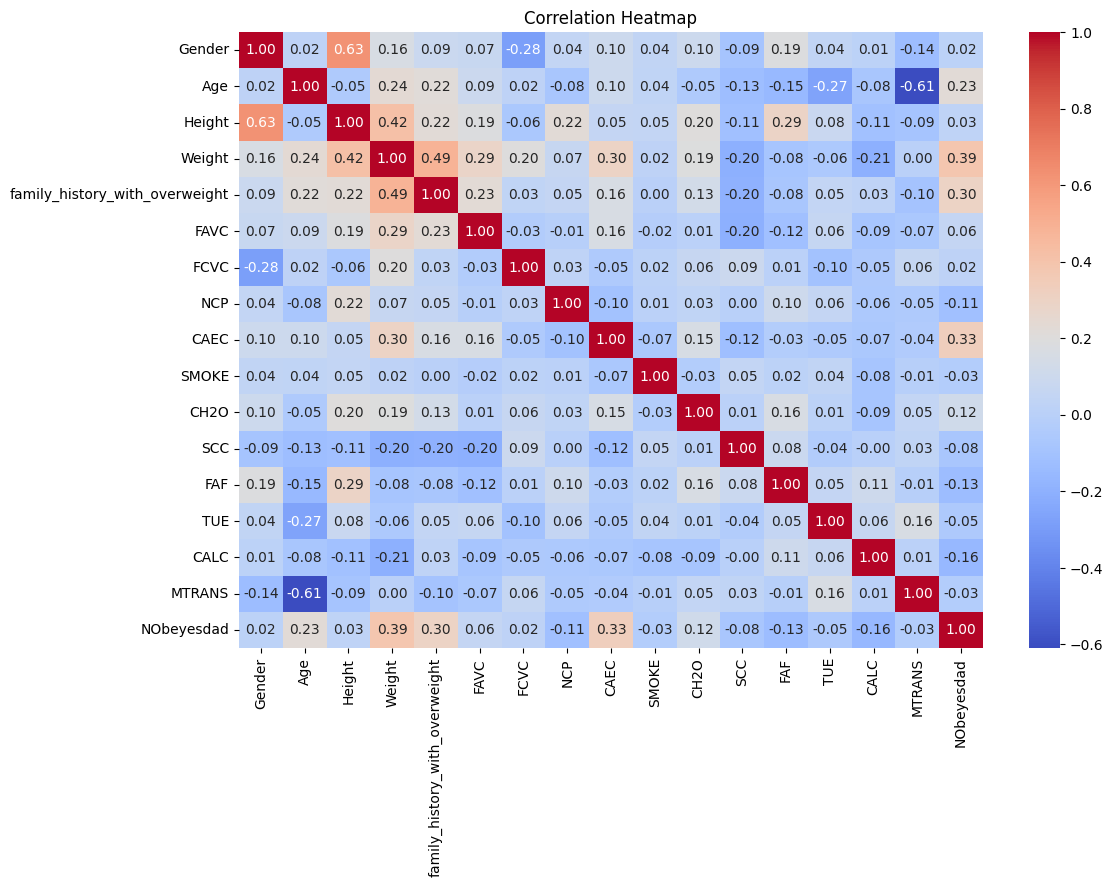

In [26]:
import seaborn as sns

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()